In [3]:
import pandas as pd
df=pd.read_excel('/Users/Ruby/Desktop/taiwanpython.xlsx')
df

,日期,close
0,1060103,9272.88
1,1060104,9286.96
2,1060105,9358.14
3,1060106,9372.22
4,1060109,9342.42
5,1060110,9349.64
6,1060111,9345.74
7,1060112,9410.18
8,1060113,9378.83
9,1060117,9354.53


In [4]:
import talib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
def myMACD(price, fastperiod=12, slowperiod=26, signalperiod=9):
    ewma12 = pd.ewma(price,span=fastperiod)#ewma為指數加權移動平均，是pandas裡面的套件
    ewma60 = pd.ewma(price,span=slowperiod)
    dif = ewma12-ewma60#dif公式：12日加權移動平均值-26日加權移動平均值
    dea = pd.ewma(dif,span=signalperiod)
    bar = (dif-dea) #有些地方的bar = (dif-dea)*2，但是talib中MACD的计算是bar = (dif-dea)*1
    return dif,dea,bar

In [6]:
#macd, signal, hist = talib.MACD(df['close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

In [7]:
macd, signal, hist = talib.MACD(df['close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

In [8]:
#mydif,mydea,mybar = myMACD(df['close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

In [9]:
mydif,mydea,mybar = myMACD(df['close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  """


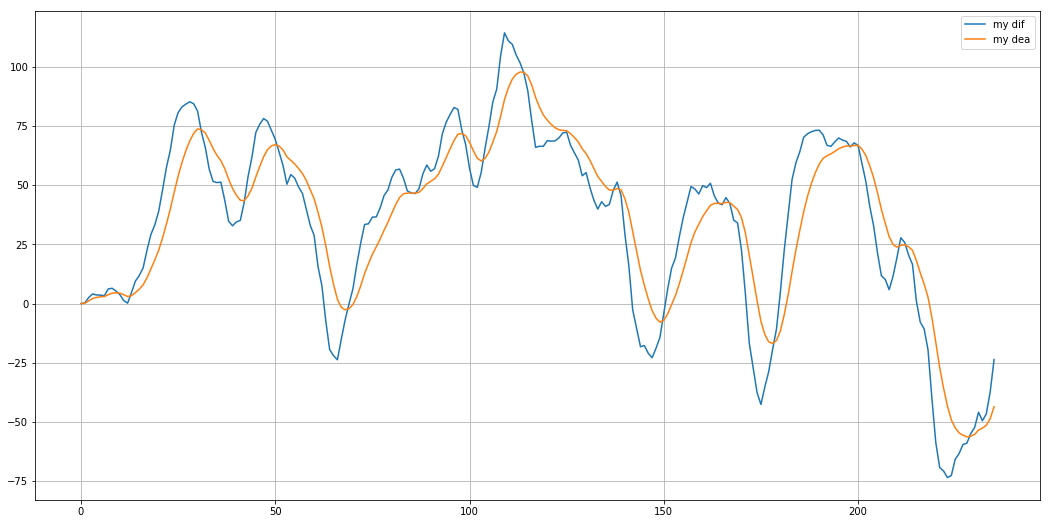

In [10]:
fig = plt.figure(figsize=[18,9])
plt.plot(df.index,mydif,label='my dif')
plt.plot(df.index,mydea,label='my dea')
plt.legend(loc='best')
plt.grid()


In [11]:
#buy=(mydif&mydea)<0 &(mydif<mydea)

策略一：打印出每次的買點與賣點，本金從100元開始，每次的報酬顯示在最下方，最後的本金為109，獲利$9

In [12]:
###macd報酬率策略一
a=np.array([100.0]) #資金的總額，假設每次買賣皆all in
tmp=[]
dec=False #判斷式 判斷是買入or賣出。若狀態為'買入'，則dec=True，避免出現連續買入。
          #直到賣出後，dec變為False，代表狀態為賣出，並過濾掉重複賣出的狀況。
for i in range(1,len(dif)):
    
    if all([(dif[i]-dea[i])-(dif[i-1]-dea[i-1])>0.0  and dec!=True ]): #當（今日離差-昨日離差）>0         
        print('buy')
        print(df.close[i]) #印出買入當日收盤價
        tmp.append(df.close[i]) #將買入當日的收盤價存入tmp的list中
        dec=True #若買進，則dec為True，之後跑if時就不會出現連續買入的狀況

    elif all([ (dif[i]-dea[i])-(dif[i-1]-dea[i-1])<0.0 and dif[i-1]<0 and dea[i-1]<0 and dec!= False ]):
       ## 當（今日離差-昨日離差）<0 且昨日dif、dea值都<0                           
        print('sell')
        print(df.close[i]) #印出賣出當日收盤價
        tmp.append(df.close[i]) #將賣出當日的收盤價存入tmp的list中

        growth=(tmp[-1])/(tmp[-2]) #計算成長率=賣出日股價/買入日股價
        a=np.append(a,a[-1]*growth) #將所有現金*成長率加入a的list中
        dec=False
b = (a[-1]-100) #計算報酬率
print(a) #印出所有擁有過的資金總額
b = (a[-1]-100) #計算報酬率
print(a) #印出所有擁有過的資金總額
print('報酬率為：',b,'%') #印出報酬率

buy
9424.05
sell
10355.76
[100.         109.88651376]


策略二：打印出每次的買點與賣點，本金從100元開始，每次的報酬顯示在最下方，最後的本金為112，獲利$12

In [15]:
###macd報酬率策略二
signal=[]
arr = [100.0]
a=np.array([100.0])
buy=[]
sell=[]
tmp=[]
dec=False
x=0
for i in range(1,len(mydif)):
    if all([(mydif[i]-mydea[i])-(mydif[i-1]-mydea[i-1])>0.0  and x!=1 ]):
        print('buy')
        print(df.close[i])
        tmp.append(df.close[i])

        dec=True
        x=1
    elif all([ (mydif[i]-mydea[i])-(mydif[i-1]-mydea[i-1])<0.0 and x!=2]):
        print('sell')
        print(df.close[i])
        tmp.append(df.close[i])
        # arr.append(arr)
        x=2

        if dec:
            growth=(tmp[-1])/(tmp[-2])
            a=np.append(a,a[-1]*growth)
        else:   
            a=np.append(a,a[-1])
        
        dec=False
print(a)

buy
9286.96
sell
9342.42
buy
9410.18
sell
9378.83
buy
9424.05
sell
9771.25
buy
9738.07
sell
9658.61
buy
9697.34
sell
9922.66
buy
9949.48
sell
9897.8
buy
9717.41
sell
9899.94
buy
9968.32
sell
9986.82
buy
10036.82
sell
10031.49
buy
10044.42
sell
10040.72
buy
10152.53
sell
10209.99
buy
10156.73
sell
10390.55
buy
10415.57
sell
10436.7
buy
10508.37
sell
10423.05
buy
10519.27
sell
10470.38
buy
10311.16
sell
10547.86
buy
10609.95
sell
10572.16
buy
10631.57
sell
10576.14
buy
10578.44
sell
10449.68
buy
10329.94
sell
10723.15
buy
10793.8
sell
10788.51
buy
10840.34
sell
10818.99
buy
10701.64
sell
10750.93
buy
10651.11
sell
10566.85
buy
10398.62
sell
10421.91
buy
10486.67
[100.         100.59718142 100.26204207 103.95588718 103.10763544
 105.50336586 104.95535592 106.92681757 107.12526085 107.06837255
 107.02893244 107.6346812  110.11255953 110.33594417 109.44009993
 108.93145946 111.43205846 111.03516522 110.45625926 109.11179373
 113.26514297 113.20963216 112.9866663  113.50706437 112.60911991
 